<a href="https://colab.research.google.com/github/s4226/ML-python/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# mnist 手寫數字辨識資料集
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [131]:
print('train data', len(x_train))
print('test data', len(x_test))

train data 60000
test data 10000


In [132]:
# 每張相素為28*28
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_train: (60000, 28, 28)
y_train: (60000,)


In [133]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap='binary')
  plt.show()

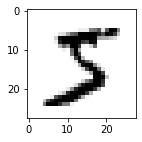

In [134]:
plot_image(x_train[0])

In [135]:
y_train[0]

5

In [136]:
# reshape 重新改變維度 astype 改變資料類型
x_train= x_train.reshape(60000,784).astype('float32')
x_test= x_test.reshape(10000,784).astype('float32')


In [137]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [138]:
x_train= x_train/255
x_test= x_test/255

In [139]:
# 分類
from keras.utils import np_utils


In [140]:
y_train= np_utils.to_categorical(y_train)

In [141]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [142]:
from keras.models import  Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 200960 = 784*256+256
# 2570 = 256*10+10

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
# 分類問題 -> cross entropy  optimizer -> adam演算法 
# 抽出20%資料做驗證資料 8:2
# accuracy -> training 正確率 val_accuracy -> 驗證資料 正確率
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history= model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
240/240 - 2s - loss: 0.3934 - accuracy: 0.8910 - val_loss: 0.2031 - val_accuracy: 0.9426
Epoch 2/10
240/240 - 1s - loss: 0.1738 - accuracy: 0.9500 - val_loss: 0.1490 - val_accuracy: 0.9581
Epoch 3/10
240/240 - 1s - loss: 0.1221 - accuracy: 0.9647 - val_loss: 0.1181 - val_accuracy: 0.9657
Epoch 4/10
240/240 - 1s - loss: 0.0937 - accuracy: 0.9737 - val_loss: 0.1046 - val_accuracy: 0.9694
Epoch 5/10
240/240 - 1s - loss: 0.0743 - accuracy: 0.9787 - val_loss: 0.0944 - val_accuracy: 0.9715
Epoch 6/10
240/240 - 1s - loss: 0.0593 - accuracy: 0.9839 - val_loss: 0.0870 - val_accuracy: 0.9742
Epoch 7/10
240/240 - 1s - loss: 0.0488 - accuracy: 0.9864 - val_loss: 0.0853 - val_accuracy: 0.9730
Epoch 8/10
240/240 - 1s - loss: 0.0408 - accuracy: 0.9886 - val_loss: 0.0813 - val_accuracy: 0.9758
Epoch 9/10
240/240 - 1s - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0782 - val_accuracy: 0.9759
Epoch 10/10
240/240 - 1s - loss: 0.0276 - accuracy: 0.9932 - val_loss: 0.0809 - val_accuracy: 0.9755

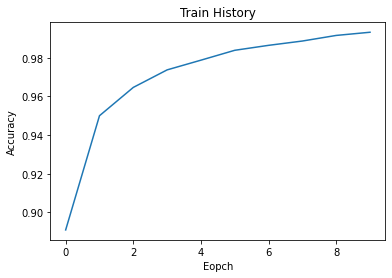

In [144]:
plt.plot(train_history.history['accuracy'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Eopch')
plt.show()

In [145]:
print(train_history.history)

{'loss': [0.3933520019054413, 0.1737750619649887, 0.12213877588510513, 0.0937218964099884, 0.07432989031076431, 0.05933773145079613, 0.04876100644469261, 0.040822964161634445, 0.03305231034755707, 0.02759120613336563], 'accuracy': [0.8909791707992554, 0.9500208497047424, 0.9646666646003723, 0.9737291932106018, 0.9787499904632568, 0.9838541746139526, 0.9864166378974915, 0.9886458516120911, 0.9915416836738586, 0.9931874871253967], 'val_loss': [0.20308449864387512, 0.1490183174610138, 0.11812752485275269, 0.10461036115884781, 0.09441119432449341, 0.08701998740434647, 0.08525747060775757, 0.08132365345954895, 0.07819996029138565, 0.08087069541215897], 'val_accuracy': [0.9425833225250244, 0.9580833315849304, 0.965666651725769, 0.9694166779518127, 0.9714999794960022, 0.9741666913032532, 0.9729999899864197, 0.9757500290870667, 0.9759166836738586, 0.9754999876022339]}


In [146]:
# predict_class -> 預測類別
prediction = model.predict_classes(x_test)

In [147]:
print(prediction)

[7 2 1 ... 4 5 6]


In [148]:
# 混淆矩陣 Confusion matrix
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,0,1,1,1,3,1,2,1
1,0,1129,3,0,0,1,1,0,1,0
2,5,4,1004,3,4,0,2,6,4,0
3,1,0,2,997,0,2,0,3,3,2
4,2,0,2,1,959,0,5,3,1,9
5,3,0,0,14,0,861,6,2,4,2
6,6,3,2,1,2,3,939,0,2,0
7,1,5,5,5,1,0,0,1005,1,5
8,3,0,3,9,4,5,2,5,941,2


作業：測試資料正確率至少大於95%

In [149]:
y_test = np_utils.to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9778
Test loss: 0.07544391602277756
Test accuracy: 0.9778000116348267


# 新增區段